# Documentation

The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3]

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. Fisher's paper was published in the Annals of Eugenics (today the Annals of Human Genetics).[1]

**Classes:**
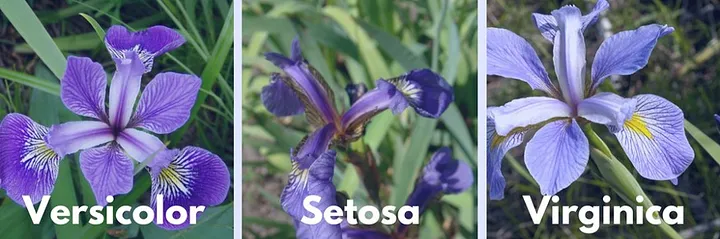

**Details:**
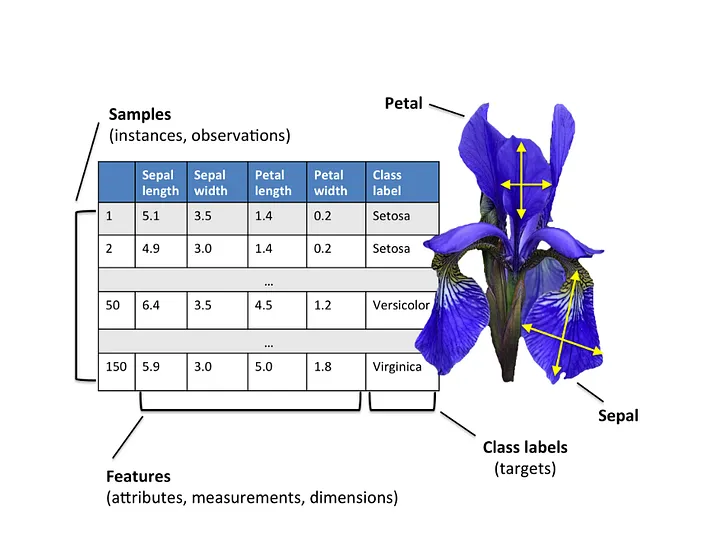

**References:**

- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#
- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://towardsdatascience.com/kernel-density-estimation-explained-step-by-step-7cc5b5bc4517
- https://www.youtube.com/watch?v=t1PEhjyzxLA
- https://medium.com/geekculture/mastering-groupby-aggregation-in-pandas-using-different-aggregated-functions-on-different-columns-9dca54b75961
- https://github.com/pepocasella/All-Data-Science/blob/main/Gaussian-Distribution/Gaussian-Distribution.ipynb

In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.style.use('ggplot')

warnings.filterwarnings('ignore')

# Data Acquisition

In [9]:
iris = datasets.load_iris()
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Data Transformation

In [10]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [11]:
dictionary = {
    0.0:'Setosa',
    1.0:'Versicolour',
    2.0:'Virginica'
}

iris['species'] = iris.target.apply(lambda x: dictionary[x])

# Data Analysis

In [14]:
iris.groupby('species')['sepal_length'].mean()

species
Setosa         5.006
Versicolour    5.936
Virginica      6.588
Name: sepal_length, dtype: float64

In [54]:
(iris.groupby('species').agg(count=('species', 'count'),
                             sepal_length_mean=('sepal_length', 'mean'),
                             sepal_width_mean=('sepal_width', 'mean'),
                             petal_length_mean=('petal_length', 'mean'),
                             petal_width_mean=('petal_width', 'mean'),
                             sepal_length_median=('sepal_length', 'median'),
                             sepal_width_median=('sepal_width', 'median'),
                             petal_length_median=('petal_length', 'median'),
                             petal_width_median=('petal_width', 'median')
)
)           

,count,sepal_length_mean,sepal_width_mean,petal_length_mean,petal_width_mean,sepal_length_median,sepal_width_median,petal_length_median,petal_width_median
species,,,,,,,,,
Setosa,50,5.006,3.428,1.462,0.246,5.0,3.4,1.50,0.2
Versicolour,50,5.936,2.770,4.260,1.326,5.9,2.8,4.35,1.3
Virginica,50,6.588,2.974,5.552,2.026,6.5,3.0,5.55,2.0


### Scatter Plot

In [38]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target',
       'species'],
      dtype='object')

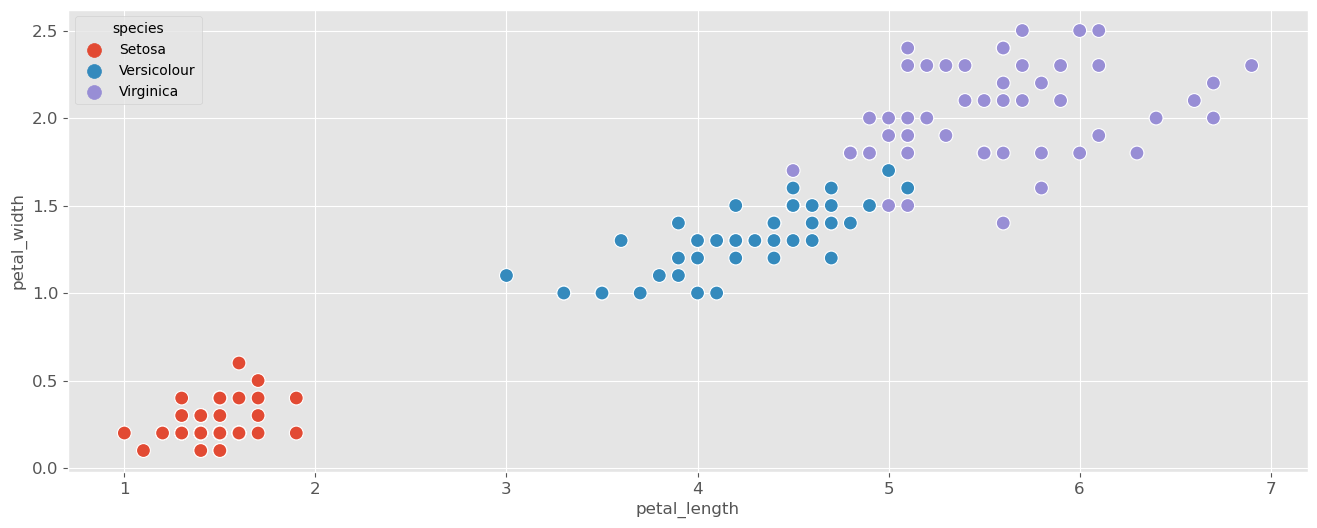

In [41]:
fig, axes = plt.subplots(figsize=(16,6))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

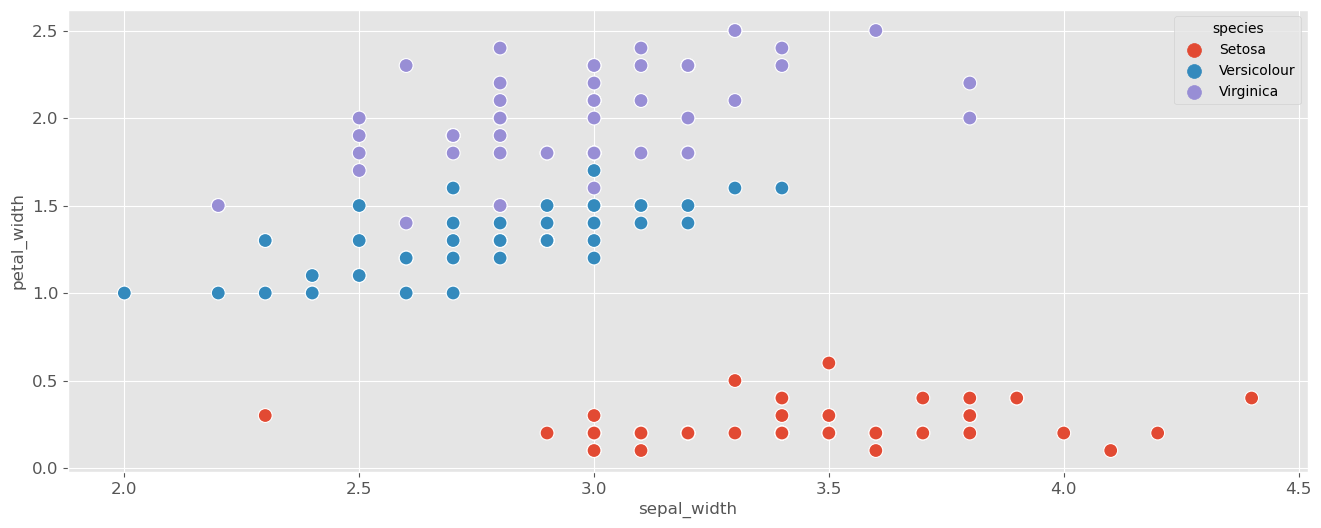

In [6]:
fig, axes = plt.subplots(figsize=(16,6))
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='species')
plt.show()

### Pair plot

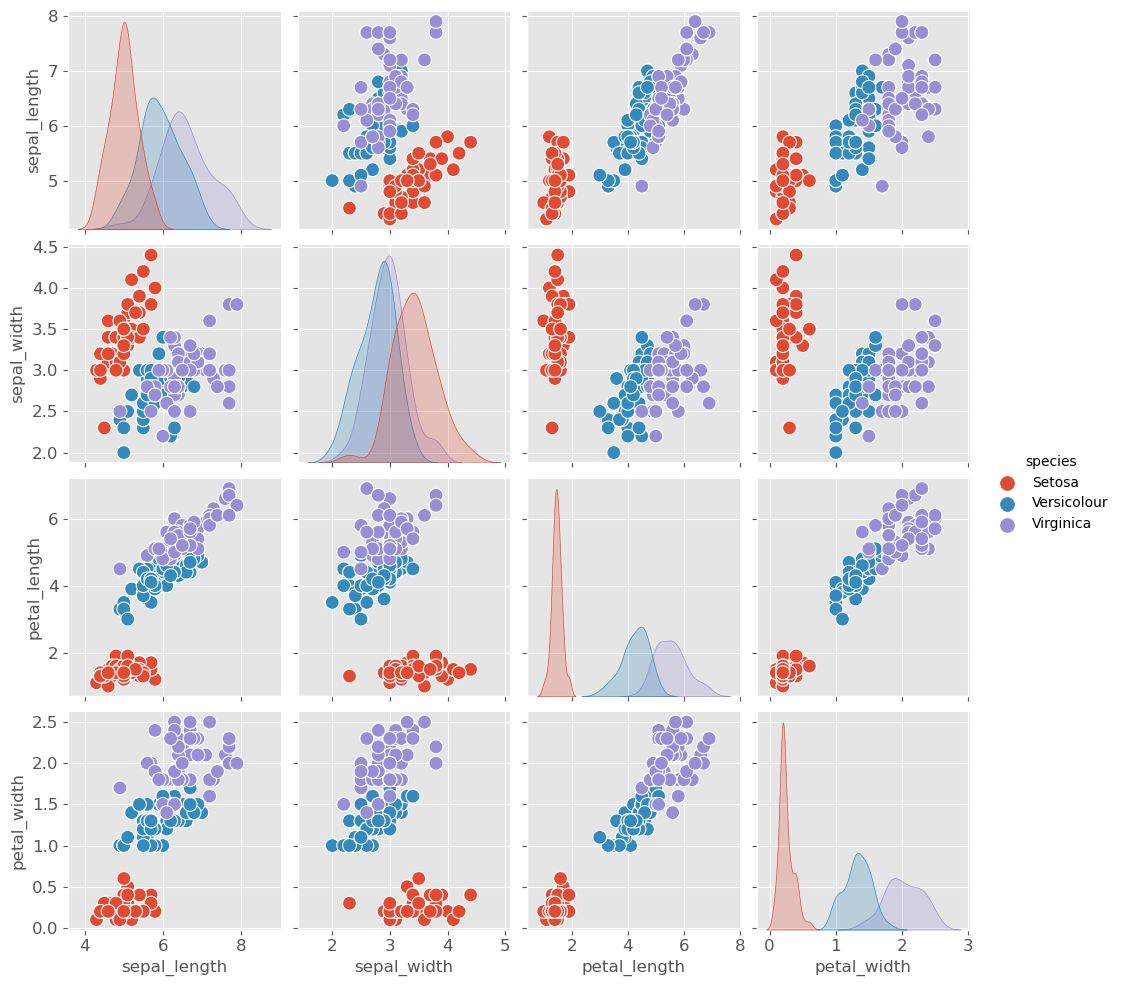

In [7]:
sns.pairplot(iris.drop(columns='target'), hue='species')
plt.show()

### Histogram with KDE (PDF)

In [49]:
from collections import Counter

Counter(iris.sepal_length)

Counter({5.0: 10,
         5.1: 9,
         6.3: 9,
         5.7: 8,
         6.7: 8,
         5.8: 7,
         5.5: 7,
         6.4: 7,
         4.9: 6,
         5.4: 6,
         6.0: 6,
         6.1: 6,
         5.6: 6,
         4.8: 5,
         6.5: 5,
         4.6: 4,
         5.2: 4,
         6.9: 4,
         6.2: 4,
         7.7: 4,
         4.4: 3,
         5.9: 3,
         6.8: 3,
         7.2: 3,
         4.7: 2,
         6.6: 2,
         4.3: 1,
         4.5: 1,
         5.3: 1,
         7.0: 1,
         7.1: 1,
         7.6: 1,
         7.3: 1,
         7.4: 1,
         7.9: 1})

In [52]:
iris.loc[iris.sepal_length <= 5].shape

(32, 6)

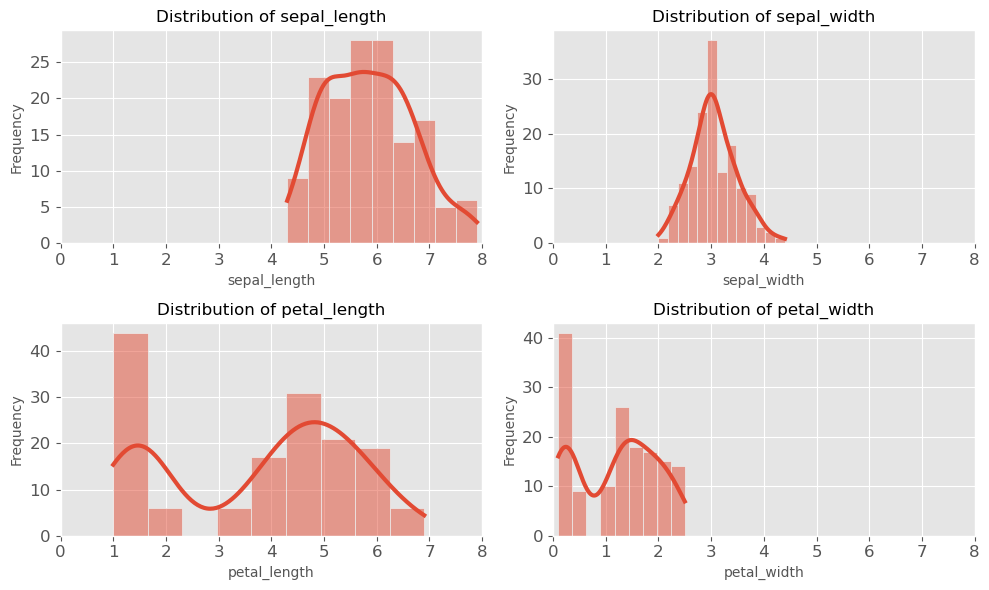

In [53]:
plt.figure(figsize=(10, 6))
n_features = len(iris.columns[:-2])
n_rows = n_features // 2 + n_features % 2  # Calculate the number of rows needed

for i, feature in enumerate(iris.columns[:-2]):
    plt.subplot(n_rows, 2, i+1)  # Adjust subplot layout dynamically
    sns.histplot(iris[feature], kde=True)
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xlim(0, 8)
    

plt.tight_layout()
plt.show()

### Boxplot

In [56]:
iris['sepal_length'].median()

5.8

In [57]:
iris['sepal_length'].mean()

5.843333333333334

(0.0, 8.0)

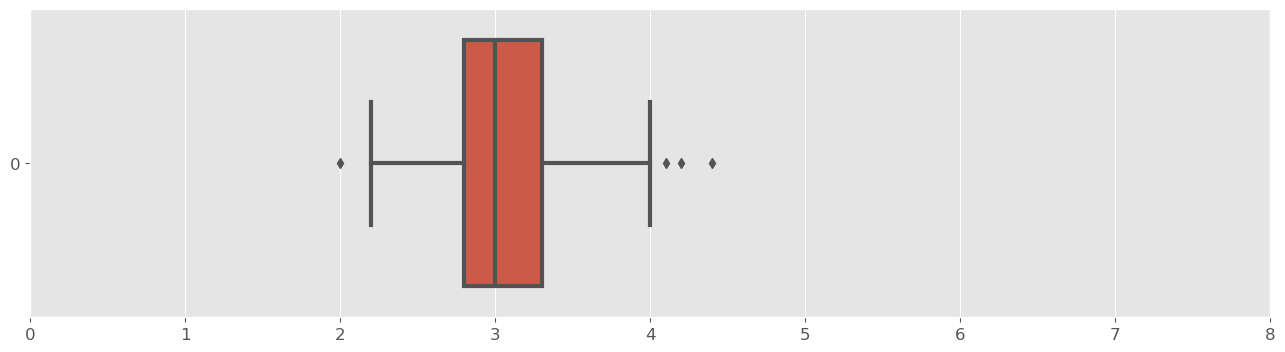

In [58]:
plt.figure(figsize=(16, 4))
sns.boxplot(iris['sepal_width'], orient='h')
plt.xlim(0,8)

In [61]:
iris.sepal_length.median()

5.8

In [60]:
iris.sepal_length.quantile(.50)

5.8

(0.0, 8.0)

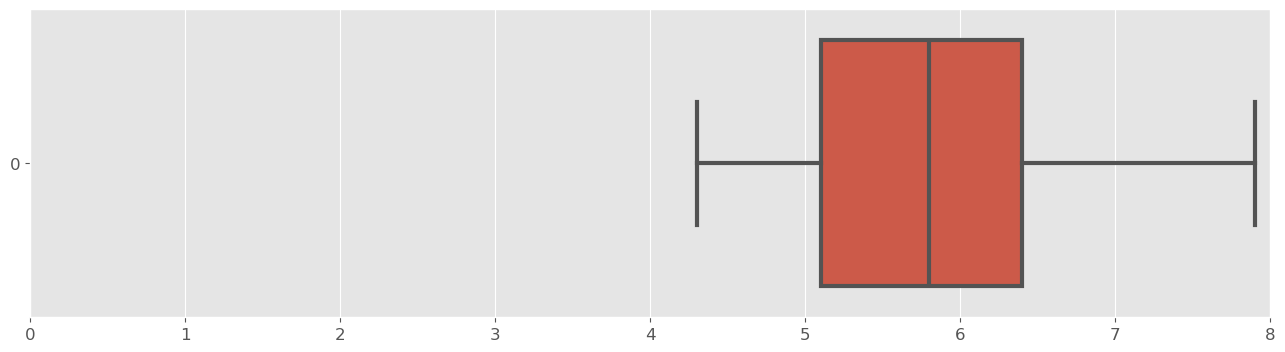

In [30]:
plt.figure(figsize=(16, 4))
sns.boxplot(iris['sepal_length'], orient='h')
plt.xlim(0,8)

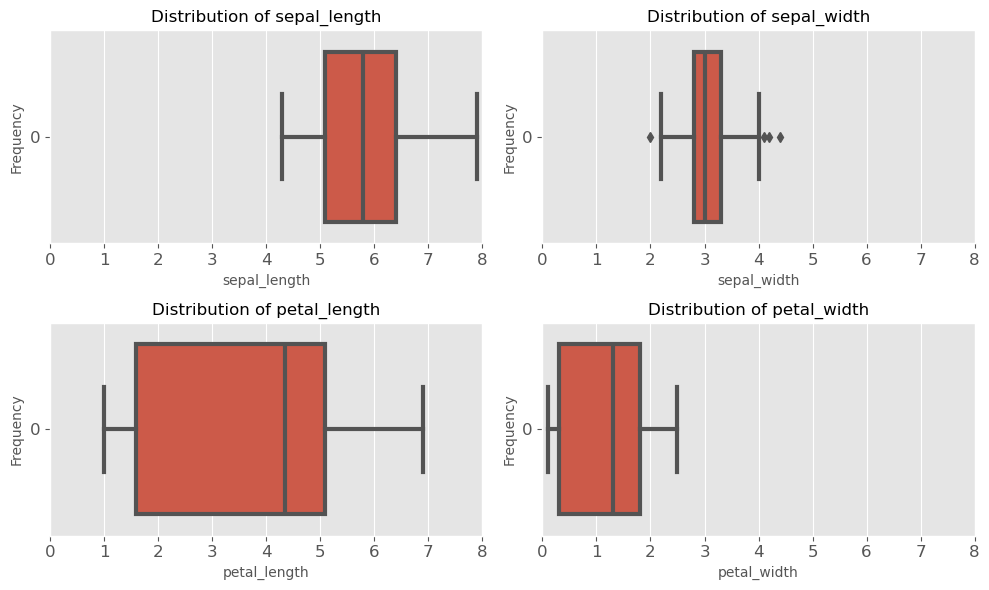

In [27]:
plt.figure(figsize=(10, 6))
n_features = len(iris.columns[:-2])
n_rows = n_features // 2 + n_features % 2  # Calculate the number of rows needed

for i, feature in enumerate(iris.columns[:-2]):
    plt.subplot(n_rows, 2, i+1)  # Adjust subplot layout dynamically
    sns.boxplot(iris[feature], orient='h')
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xlim(0,8)

plt.tight_layout()
plt.show()

___

# Prediction

In [9]:
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
X = iris.iloc[:, :-2]
y = iris.iloc[:, -2]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

### Decison Tree

In [11]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=0)
tree.fit(X_train, y_train)
tree_prediction = tree.predict(X_test)
print(classification_report(y_test, tree_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.76      0.96      0.85        23
         2.0       0.93      0.67      0.78        21

    accuracy                           0.87        60
   macro avg       0.90      0.87      0.87        60
weighted avg       0.88      0.87      0.86        60



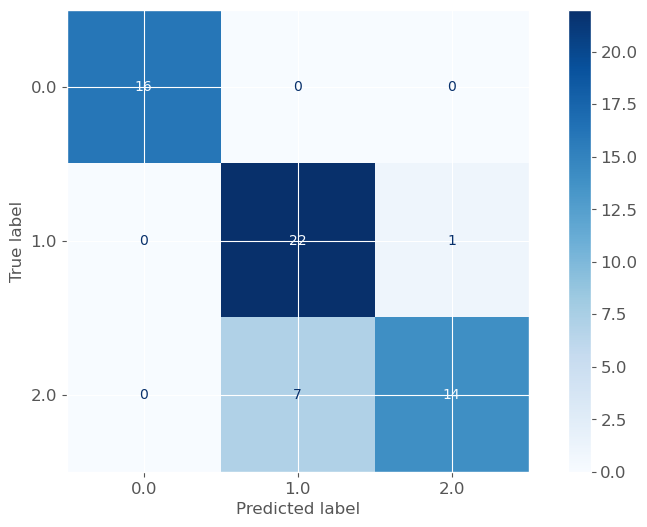

In [12]:
disp = ConfusionMatrixDisplay.from_estimator(
    tree,
    X_test,
    y_test,
    display_labels= iris.target.unique(),
    cmap=plt.cm.Blues,
)
plt.show()

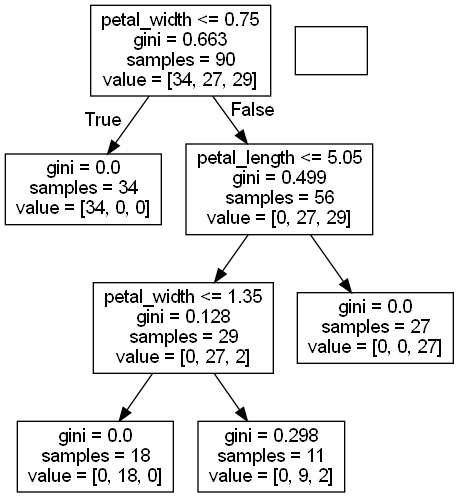

In [13]:
# Plotting of decission tree
from IPython.display import Image
from sklearn.tree import export_graphviz

#!pip install pydotplus
import pydotplus


features = X.columns
dot_data = export_graphviz(tree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Random Forrest

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.88      0.96      0.92        23
         2.0       0.95      0.86      0.90        21

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



### KNN

In [15]:
# this examines 3 neighbours for putting the new data into a class
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.92      0.96      0.94        23
         2.0       0.95      0.90      0.93        21

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

